In [1]:
options(repr.plot.width=14, repr.plot.height=6)

# The Problem of Correlated Errors


## Least-squares is No Longer BLUE

## Correlation Affects the Standard Errors

### Theory

### Simulation
To see this, we can run a simulation in `R`. First, we use the `mvrnorm()` function from the `MASS` package to simulate 1,000 realisations of two repeated measurements with a correlation of $\rho = 0.8$. To do this, we use the following sampling model:

$$
\begin{bmatrix}
    y_{i1} \\
    y_{i2} \\
\end{bmatrix}
\sim\mathcal{N}\left(
\begin{bmatrix}
    0 \\
    0 \\
\end{bmatrix},
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1 \\
\end{bmatrix}
\right)
$$

We can think of this as the data for subject $i$ being drawn from a 2-dimensional normal distribution, where each dimension represents one of the repeated measurements. The mean vector is $\boldsymbol{\mu} = \left[0, 0\right]$, so there is no average difference between the conditions[^foot1]. The variance-covariance matrix is then given by

$$
\boldsymbol{\Sigma} = 
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1 \\
\end{bmatrix},
$$

such that $\sigma^{2}_{y_{i1}} = \sigma^{2}_{y_{i2}} = 1$ and the covariance is $\text{Cov}\left(y_{i1},y_{i2}\right) = \rho\sigma_{y_{i1}}\sigma_{y_{i2}} = \rho = 0.8$. The `R` code is then:

In [8]:
library(MASS)
set.seed(666) # For reproducibility

Sigma_dep <- matrix(c(1,0.8,0.8,1),2,2)
y_dep     <- mvrnorm(n=1000, mu=c(0,0), Sigma=Sigma_dep)

head(y_dep)

0.67694323,0.7523640
1.41638562,2.4055836
-0.04662682,-0.6271934
2.28473091,1.5634470
-2.09179707,-2.1144265
0.59623540,0.8427202


The result of this is that we have simulated 1,000 pairs of data-points that are correlated. You can think of this like sampling 1,000 subjects, where each subject provides a pair of correlated measurements (such as a score from two different within-subject conditions of a task).

We can compare this with a similar situation where there is *no* correlation between the measurements, i.e.

$$
\boldsymbol{\Sigma} = 
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}.
$$

Because all the measurements are independent, we do not really need the `mvrnorm()` function, but we keep it here for consistency. The `R` code would be:

In [11]:
Sigma_indep <- matrix(c(1,0,0,1),2,2)
y_indep     <- mvrnorm(n=1000, mu=c(0,0), Sigma=Sigma_indep)

head(y_indep)

-0.5377941,0.5408571
-0.6705118,-2.3190040
1.0993015,-0.5375715
-0.1872913,1.6585131
0.3117156,0.7840054
1.6482554,-1.4637198


In both cases, we conceptualise the columns as representing two different conditions of an experiment. As such, our interest lies in the *difference* between the columns. So, as a final step, we subtract the columns and then compare the distributions of differences.

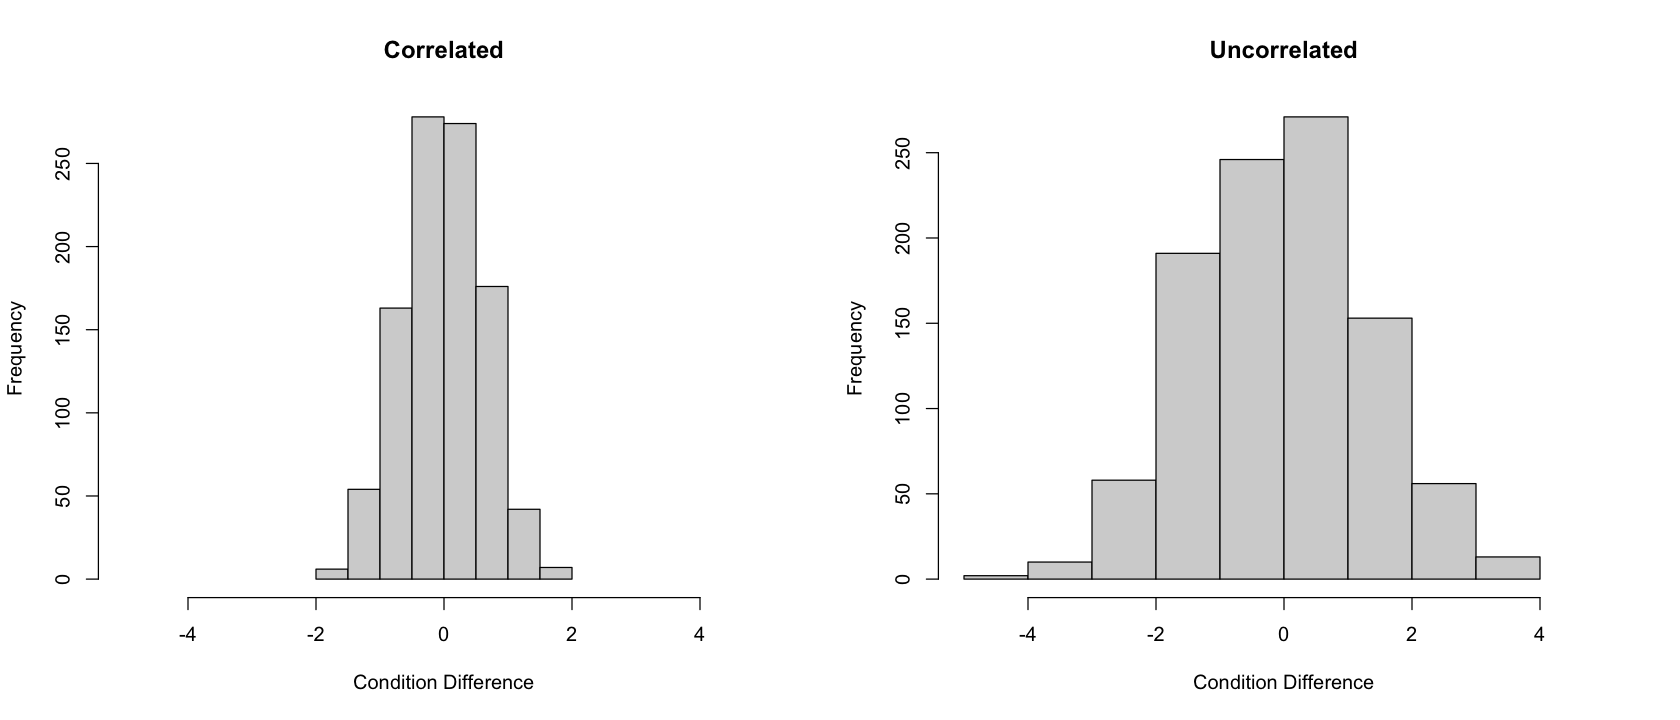

In [14]:
y_diff_dep   <- y_dep[,1]   - y_dep[,2]
y_diff_indep <- y_indep[,1] - y_indep[,2]

par(mfrow=c(1,2))
hist(y_diff_dep,   xlim=c(-5,5), xlab='Condition Difference', main='Correlated')
hist(y_diff_indep, xlim=c(-5,5), xlab='Condition Difference', main='Uncorrelated')

[^foot1]: For the purpose of this simulation, the fact that there is no mean difference does not matter. All this influences is what number the distribution of differences is centred-on.